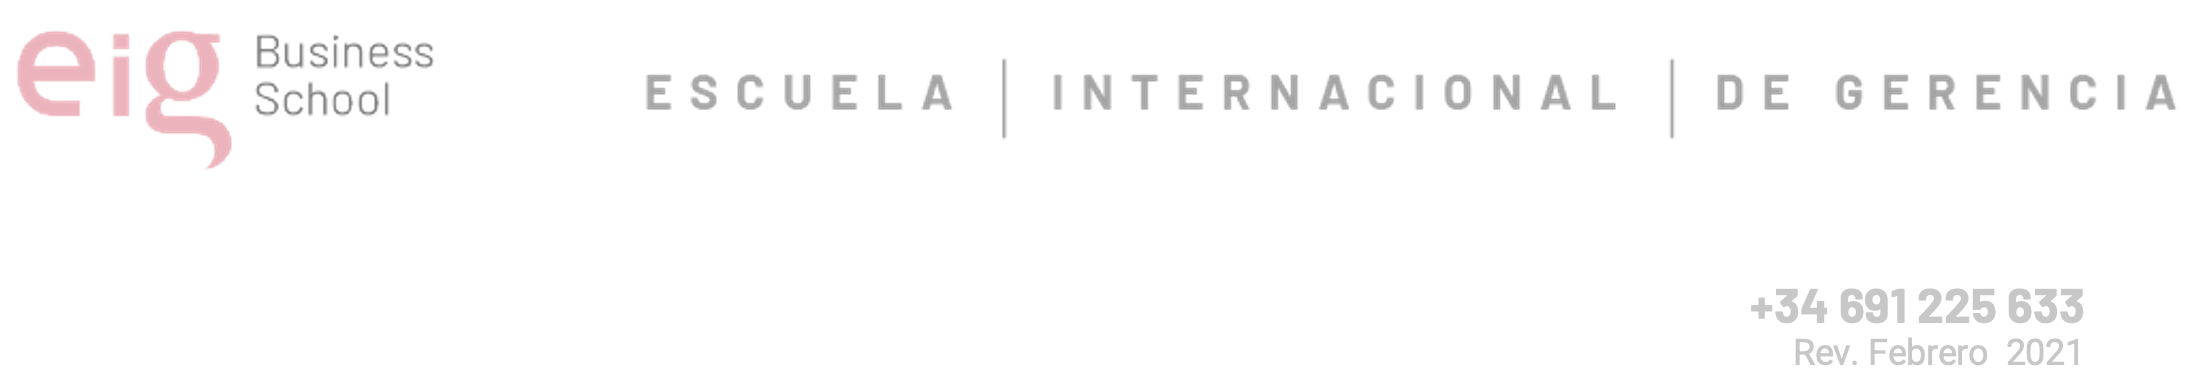

Autor:  
Manuel Eugenio Morocho Cayamcela, PhD

# **Lectura 3.1:**  
## Clasificación de IRIS con $k$-vecinos más cercanos (kNN)

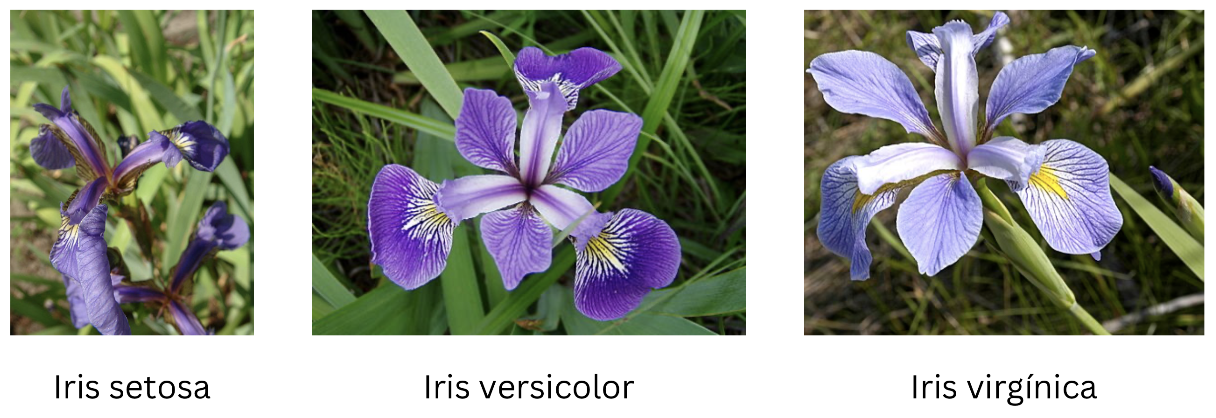

## **Introducción:**


En esta lectura utilizaremos el algoritmo de aprendizaje supervisado $k$-vecinos más cercanos (kNN) para clasificar las flores IRIS en función de las medidas de sépalos y pétalos. Para este propósito se utiliza el dataset IRIS, un conocido conjunto de datos de referencia en el campo del data mining, que comprende 150 muestras de flores IRIS, cada una con cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

El conjunto de datos Iris es un conjunto de datos multivariante introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". Es a veces llamado el conjunto de datos de Anderson Iris porque Edgar Anderson recogió los datos para cuantificar la variación morfológica de las flores Iris de tres especies relacionadas.

La lectura abarca varias etapas que incluyen importación y preparación de datos, análisis exploratorio, preprocesamiento, construcción de un modelo de clasificación utilizando el algoritmo $k$-NN, y evaluación del modelo.

Este Notebook sirve como una guía completa y proporciona instrucciones paso a paso y fragmentos de código para implementar la clasificación $k$-NN para el reconocimiento de especies de flores IRIS.

Se puede utilizar este proyecto como referencia o punto de partida para trabajos similares de clasificación de datos.

## **Contenido:**

### Cargamos la base de datos de IRIS

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos la base de datos 'iris.csv'
iris = pd.read_csv('/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/2024 Maestría Ciencia de Datos y Máquinas de Aprendizaje mención IA/Contenidos/Notebooks_DataMining/Bases de Datos/iris.csv')

### Análisis Exploratorio de Datos

In [3]:
# Mostramos las primeras 5 filas de la base de datos
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Mostramos las últimas 5 filas de la base de datos
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Mostramos la información de la base de datos 'iris'
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Mostramos la descripción estadística de la base de datos 'iris'
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Preprocesamiento de datos

El código `iris = iris.drop('Id', axis=1)` está eliminando la columna 'Id' del DataFrame `iris`. 

La función `drop()` de pandas se utiliza para eliminar filas o columnas especificadas de un DataFrame. En este caso, se está eliminando la columna 'Id'. 

El argumento `axis=1` especifica que se debe eliminar una columna en lugar de una fila. Si `axis=0`, se eliminaría una fila.

Finalmente, el resultado se está asignando de nuevo a `iris`, lo que significa que se está modificando el DataFrame original en lugar de crear uno nuevo.

In [2]:
# Eliminanos la columna 'Id' de la base de datos 'iris'
iris = iris.drop('Id', axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualización de Datos

`ProfileReport` es una clase de `ydata_profiling` que genera un informe de perfilado de datos. Se le pasa el DataFrame `iris` como argumento, junto con un título para el informe y `explorative=True` para indicar que se debe realizar un análisis exploratorio de datos.

`profile.to_widgets()` genera el informe como una serie de widgets interactivos en el cuaderno Jupyter.

El informe de perfilado de datos proporciona un análisis rápido de los datos en el DataFrame `iris`, incluyendo el número de valores faltantes, la distribución de los datos, la correlación entre las características, y más. Es una herramienta útil para la exploración inicial de los datos.

In [4]:
# Usamos y_data profiler para obtener un reporte de la base de datos
from ydata_profiling import ProfileReport

# Generamos el reporte de perfilado de datos
profile = ProfileReport(iris, title='Reporte de Perfilado de Datos', explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Comparamos las variables 'Sepal Length' y 'Sepal Width'

El gráfico de dispersión se crea a partir de los datos en el DataFrame `iris`. Los valores de la columna 'SepalLengthCm' se utilizan para el eje x, los valores de la columna 'SepalWidthCm' se utilizan para el eje y, y los valores de la columna 'Species' se utilizan para colorear los puntos.

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

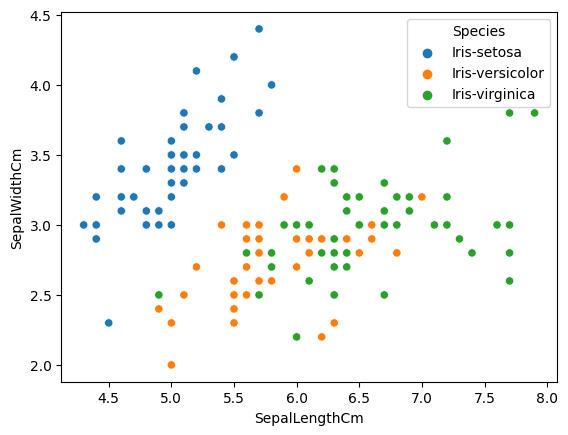

In [5]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)

Del gráfico anterior podemos inferir que:

* La especie Setosa tiene sépalos de menor longitud pero mayor ancho de sépalo.
* La especie Versicolor se encuentra en el medio de las otras dos especies en términos de largo y ancho de sépalo.
* La especie Virginica tiene sépalos de mayor longitud pero menores anchos de sépalo.

#### Comparamos las variables 'Petal Length' y 'Petal Width'

El gráfico de dispersión se crea a partir de los datos en el DataFrame `iris`. Los valores de la columna 'PetalLengthCm' se utilizan para el eje x, los valores de la columna 'PetalWidthCm' se utilizan para el eje y, y los valores de la columna 'Species' se utilizan para colorear los puntos.

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

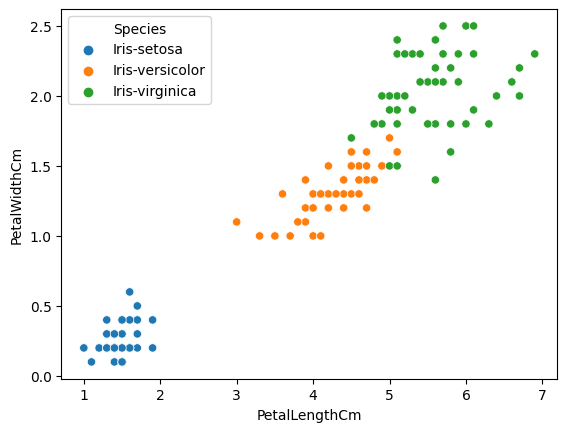

In [4]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris)

Del gráfico anterior podemos inferir que:

* La especie Setosa tiene pétalos de menor longitud y ancho.
* La especie Versicolor se encuentra en el medio de las otras dos especies en términos de longitud y ancho de pétalos.
* La especie Virginica tiene el mayor largo y ancho de pétalos.

#### Graficamos las relaciones de todas las columnas

La función `pairplot` crea un gráfico de dispersión para cada par de características en el DataFrame `iris`, y un histograma para cada característica a lo largo de la diagonal. 

El argumento `hue='Species'` indica que los puntos deben ser coloreados de acuerdo con la columna 'Species'. 

/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/2024 Maestría Ciencia de Datos y Máquinas de Aprendizaje mención IA/Contenidos/Notebooks_DataMining/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/2024 Maestría Ciencia de Datos y Máquinas de Aprendizaje mención IA/Contenidos/Notebooks_DataMining/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/eugenio/Library/CloudStorage/OneDrive-Personal/UIDE/2024 Maestría Ciencia de Datos y Máquinas de Aprendi

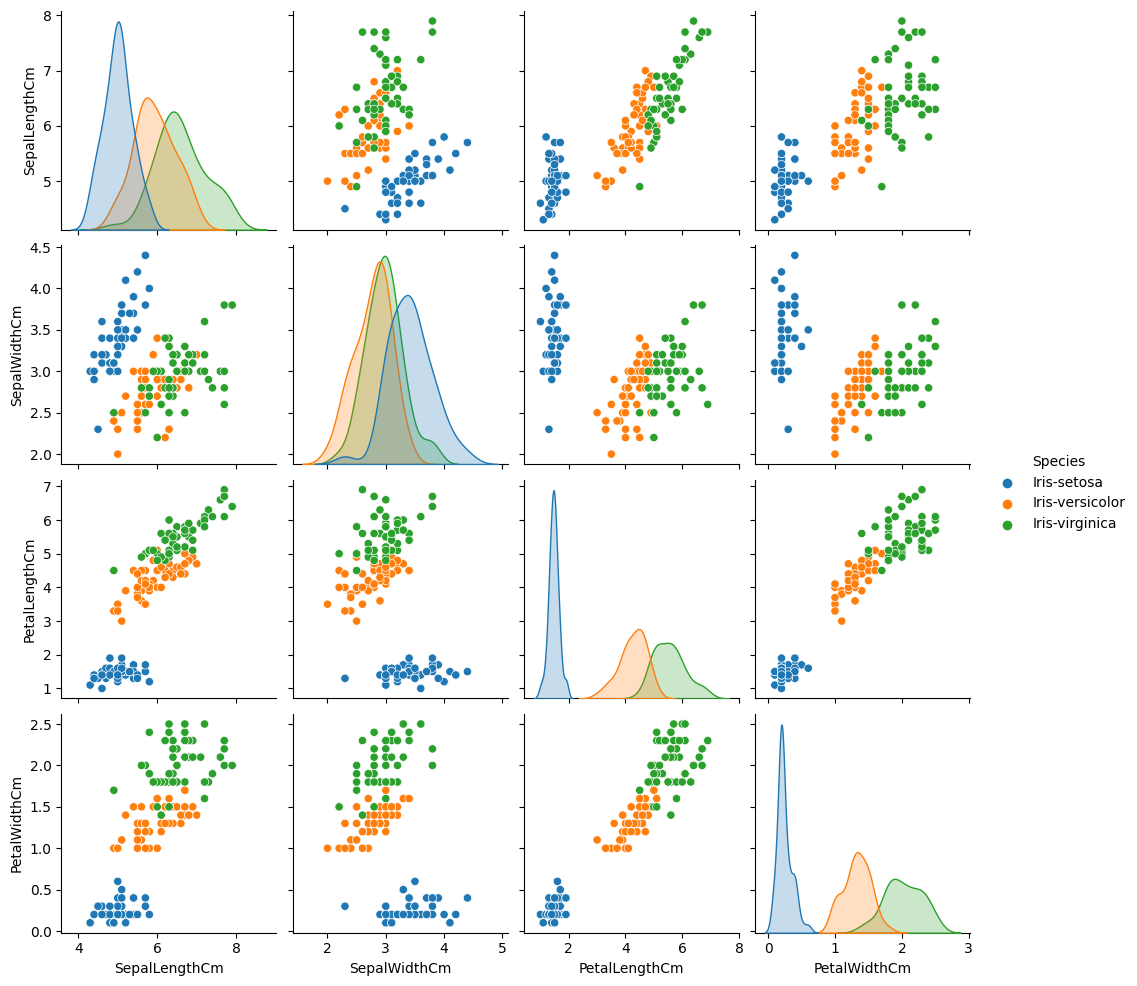

In [3]:
# Visualizamos la relación entre las características
sns.pairplot(iris, hue='Species')

Podemos ver muchos tipos de relaciones en esta gráfica, como que la especie Setosa tiene el ancho y largo de pétalos más pequeño. También tiene la longitud de sépalo más pequeña pero el ancho de sépalo más grande. Esta información se puede recopilar sobre cualquier otra especie.

### Modelado

#### Aislamos las variables predictoras

La función `drop` de pandas se utiliza para eliminar la columna 'Species' del DataFrame. El argumento `axis=1` indica que se debe eliminar una columna (en lugar de una fila).

El resultado se almacena en la variable `X`, que ahora contiene solo las variables predictoras.

In [7]:
# Aislamos las variables predictoras
X = iris.drop('Species', axis=1)
X.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Aislamos la variable objetivo

Este código está aislando la variable objetivo del DataFrame `iris` al seleccionar solo la columna `'Species'`.

In [8]:
# Aislamos la variable objetivo
y = iris['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

#### Dividimos los datos en sub datasets para entrenamiento y prueba

Utilizamos la función `train_test_split` de la biblioteca `sklearn.model_selection` para dividir las variables predictoras `X` y la variable objetivo `y` en conjuntos de entrenamiento y prueba.

El argumento `test_size=0.2` indica que el 20% de los datos se reservarán para el conjunto de prueba, y el 80% restante se utilizará para el conjunto de entrenamiento.

Los resultados se almacenan en `X_train`, `X_test`, `y_train`, y `y_test`. `X_train` y `y_train` contienen los datos de entrenamiento (las variables predictoras y la variable objetivo, respectivamente), mientras que `X_test` y `y_test` contienen los datos de prueba.

La división de los datos en conjuntos de entrenamiento y prueba es un paso importante en la preparación de los datos para el aprendizaje automático. El modelo se entrena en el conjunto de entrenamiento y luego se prueba en el conjunto de prueba para evaluar su rendimiento.

In [9]:
# Dividimos la base de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Entrenamos el clasificador $k$-NN

Utilizamos la biblioteca `sklearn.neighbors` para importar la clase `KNeighborsClassifier`, que implementa el algoritmo de clasificación $k$-Nearest Neighbors ($k$-NN).

Luego, se crea una instancia de `KNeighborsClassifier` con `n_neighbors=5`, lo que significa que el algoritmo k-NN utilizará los 5 vecinos más cercanos para hacer sus predicciones.

Finalmente, se entrena el modelo utilizando el método `fit`, que toma las variables predictoras de entrenamiento (`X_train`) y la variable objetivo de entrenamiento (`y_train`) como argumentos.

In [10]:
# Importamos el modelo k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo K-Nearest Neighbors
classifier = KNeighborsClassifier(n_neighbors=5)

# Entrenamos el modelo
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Ahora usamos el modelo `classifier` que se entrenó anteriormente para hacer predicciones en el conjunto de prueba `X_test`.

El método `predict` de `classifier` toma las variables predictoras de prueba (`X_test`) como argumento y devuelve las predicciones correspondientes.

Estas predicciones se almacenan en la variable `y_pred`.

Por lo tanto, después de ejecutar este código, `y_pred` contendrá las predicciones del modelo para los datos en `X_test`. Estas predicciones pueden compararse con los valores reales en `y_test` para evaluar el rendimiento del modelo.

In [11]:
# Realizamos la predicción en los datos de X_test
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

### Evaluación del modelo

Este código está utilizando la función `accuracy_score` de la biblioteca `sklearn.metrics` para calcular la precisión del modelo de clasificación.

La precisión es una métrica común para evaluar modelos de clasificación. Se calcula como el número de predicciones correctas dividido por el número total de predicciones.

La función `accuracy_score` toma dos argumentos: los valores reales (`y_test`) y las predicciones del modelo (`y_pred`). Devuelve la precisión del modelo como un número entre 0 y 1, donde 1 indica una precisión perfecta.

Por lo tanto, después de ejecutar este código, la variable `acc` contendrá la precisión del modelo, y esta precisión se imprimirá en la consola.

In [12]:
# Importamos la métrica de precisión
from sklearn.metrics import accuracy_score

# Calculamos la precisión del modelo
acc = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", acc)

Precisión del modelo: 1.0


#### Matriz de Confusión

Este código está utilizando la función `confusion_matrix` de la biblioteca `sklearn.metrics` para calcular la matriz de confusión del modelo de clasificación.

La matriz de confusión es una tabla que muestra las predicciones correctas e incorrectas del modelo, divididas por clase. Los valores en la diagonal principal de la matriz representan las predicciones correctas, mientras que los otros valores representan las predicciones incorrectas.

La función `confusion_matrix` toma dos argumentos: los valores reales (`y_test`) y las predicciones del modelo (`y_pred`). Devuelve la matriz de confusión como un array de NumPy.

Luego, se utiliza la función `heatmap` de seaborn para visualizar la matriz de confusión. Los argumentos `xticklabels` y `yticklabels` se establecen en las especies únicas de iris, que se obtienen de la columna 'Species' del DataFrame `iris`. El argumento `cmap='Blues'` establece el mapa de colores del gráfico de calor en tonos de azul.

Por lo tanto, después de ejecutar este código, se mostrará un gráfico de calor de la matriz de confusión, que puede ayudarte a entender mejor el rendimiento del modelo.

<Axes: >

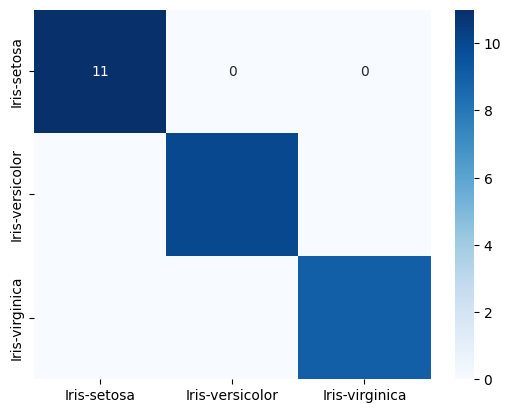

In [17]:
# Importamos la matriz de confusión 
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión con los nombres de las especias
cf_matrix = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión con los nombres de las especies de IRIS
sns.heatmap(cf_matrix, annot=True, xticklabels=iris['Species'].unique(), yticklabels=iris['Species'].unique(), cmap='Blues')


## **Conclusiones:**

En este notebook, hemos realizado un análisis exploratorio de datos y aplicado un modelo de aprendizaje automático a un conjunto de datos de iris. 

Primero, visualizamos los datos utilizando gráficos de dispersión y pairplots de seaborn para entender las relaciones entre las diferentes características. 

Luego, preparamos los datos para el aprendizaje automático al aislar las variables predictoras y la variable objetivo, y dividir los datos en conjuntos de entrenamiento y prueba.

Después, importamos y entrenamos un modelo de clasificación $k$-Nearest Neighbors ($k$-NN) en los datos de entrenamiento, y utilizamos este modelo para hacer predicciones en los datos de prueba.

Finalmente, evaluamos el rendimiento del modelo calculando su precisión y visualizando su matriz de confusión.

A través de este proceso, hemos aprendido cómo explorar y preparar datos para el aprendizaje automático, cómo entrenar y utilizar un modelo de clasificación k-NN, y cómo evaluar el rendimiento de un modelo de clasificación. Este conocimiento será útil para futuros proyectos de aprendizaje automático.

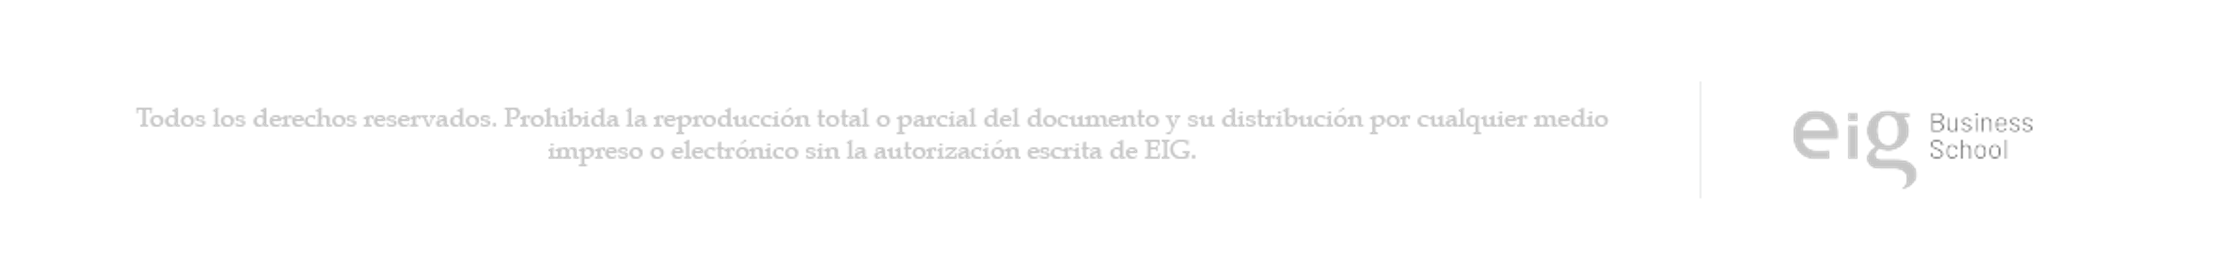